In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import time
import math
import torch

In [3]:
# Importing the dataset
df = pd.read_csv('Medical Price Dataset.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Different regions -  ['southwest' 'southeast' 'northwest' 'northeast']
Different numbers of children -  [0 1 3 2 5 4]


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
# Looking for how many unique values there are in the categorical features
# With only 1338 individuals, the data is extremely small.
# Each instance has a set of attributes that include information on the age, sex, bmi, region, number of children, and whether or not they smoke.
# The southeast, southwest, northeast, and northwest are the four categories in the area.
# There are no mistakes or blank fields in the data at all.
# All of this is contrasted with the costs associated with health insurance.

print('Different regions - ', df['region'].unique())
print('Different numbers of children - ', df['children'].unique())

Different regions -  ['southwest' 'southeast' 'northwest' 'northeast']
Different numbers of children -  [0 1 3 2 5 4]


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


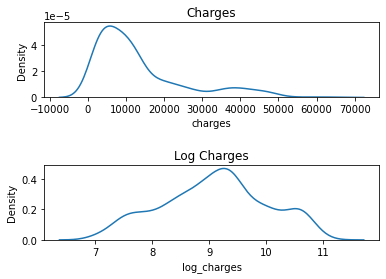

In [11]:
# The charges' distribution reveals that the data is positively skewed.
# The data appears significantly better after the log has been taken.
# I believe there are groups within the instances since there are peaks in the distribution.
# Adding a log charges as well as charges to train a model to later
df['log_charges'] = np.log(df['charges'])

# PLotting the distribution of charges and log charges to check for normal distribution
fig, ax = plt.subplots(nrows=2)
sns.distplot(df['charges'], ax=ax[0], hist=False).set_title('Charges')
sns.distplot(df['log_charges'], ax=ax[1], hist=False).set_title('Log Charges')
plt.subplots_adjust(hspace=0.9)
plt.show()

In [12]:
# The charges are significantly correlated with both age and bmi.
# However, I am quite shocked by how weak the association is, especially when it comes to bmi, which I had assumed would have a big impact on health.
# Later, I'll investigate the cause of this.

print('bmi correlation - ', df['charges'].corr(df['bmi']))
print('age correlation - ', df['charges'].corr(df['age']))

bmi correlation -  0.1983409688336288
age correlation -  0.2990081933306476


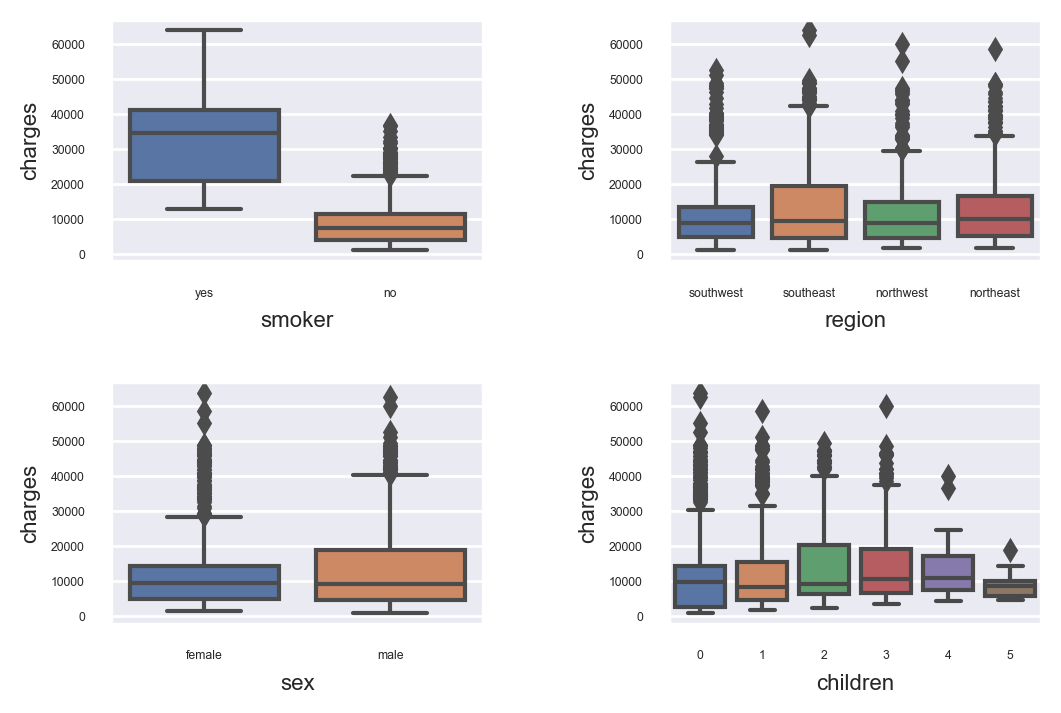

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [16]:
# Adjusting the font size of the figures to match the overall figure size
sns.set(font_scale = 0.4)

# Plotting box and whiskers to show the distribution of charges according to these features
fig = plt.figure(dpi=200)
plt.rcParams["axes.labelsize"] = 8
fig.subplots_adjust(hspace=0.5, wspace=0.5)
ax = fig.add_subplot(2, 2, 1)
sns.boxplot(data=df, x='smoker', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 2)
sns.boxplot(data=df, x='region', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 3)
sns.boxplot(data=df, x='sex', y='charges', ax=ax)
ax = fig.add_subplot(2, 2, 4)
sns.boxplot(data=df, x='children', y='charges', ax=ax)
plt.show()
sns.set(font_scale = 1)

# How many are in each category of children
print(df['children'].value_counts())

In [17]:
# The categorical data make it quite evident that smoking has the strongest relationship to charges.
# Though not significantly, there seems to be some link between sex and region.
# I'm not sure how much of an impact the number of kids has on the fees, but it does seem to matter.
# First off, there are relatively few cases with 4 or 5 kids, so I wouldn't trust that data.
# Second, there doesn't seem to be a general pattern with the 0 children group.
# Therefore, rather than leaving it as an ordinal feature (0–5), I would divide this category up for a linear regression analysis into its constituent categories.

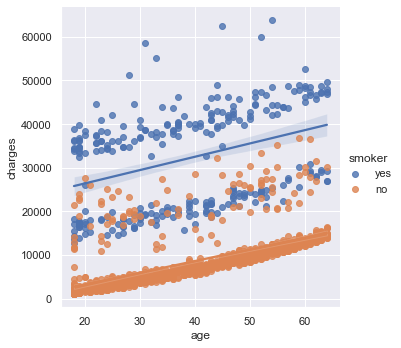

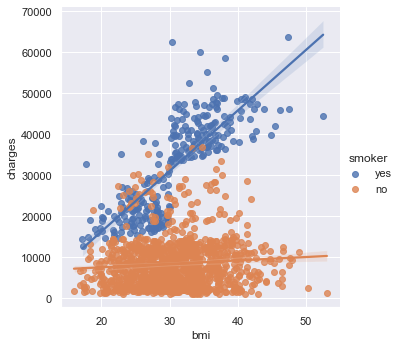

In [20]:
# Scatter plots to show the correlation between features and charges
sns.lmplot(data=df, x='age', y='charges', hue='smoker')
plt.show()
sns.lmplot(data=df, x='bmi', y='charges', hue='smoker')
plt.show()

In [21]:
# The scatter plot of age and charges demonstrates the clear disparity between the treatment of smoking and non-smoking situations.
# While the non-smokers are presumably all in one group with a few outliers, the smokers appear to have broken into two new groups.
# You can see the set of outliers at the top of the plot; these will presumably be caused by various health issues and are mirrored in the smoking group.
# This contrast between smokers and non-smokers is once again evident in the scatter plot of bmi against charges.
# But in this instance, we can observe how the smokers are split into groups based on whether their BMI is below or above 30.
# These schemes do not reveal what might sometimes be the reason for the unusually high charges.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `k

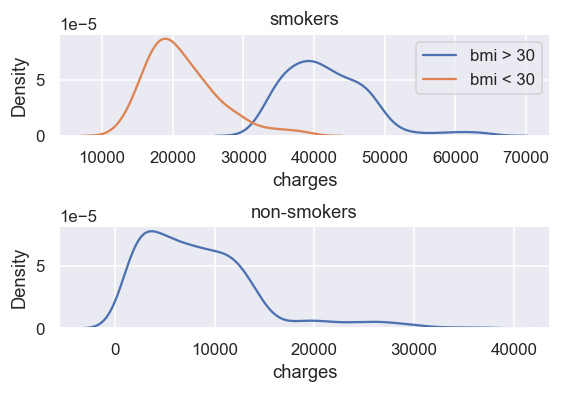

In [22]:
fig, ax = plt.subplots(nrows=2, dpi=110)
fig.tight_layout(pad=3.0)
# Plotting for smokers with bmi over 30
sns.distplot(df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]["charges"], ax=ax[0], hist=False,
             label='bmi > 30').set_title('smokers')
# Plotting for smokers with bmi under 30
sns.distplot(df[(df['smoker'] == 'yes') & (df['bmi'] < 30)]["charges"], ax=ax[0], hist=False, label='bmi < 30')
# Plotting for non smokers
sns.distplot(df[(df['smoker'] == 'no')]["charges"], ax=ax[1], hist=False).set_title('non-smokers')
ax[0].legend()
plt.show()

# Given this information, we can now display the charge distribution while dividing it into our three simple groups: non-smokers, smokers with a bmi > 30, and smokers with a bmi 30.
# As expected, some of the peaks have a tail, which stands out on the scatter plots above even though it is quite consistent, indicating that these are for a medical purpose.
# Interestingly, smokers with a bmi under 30 do not have the same tail.

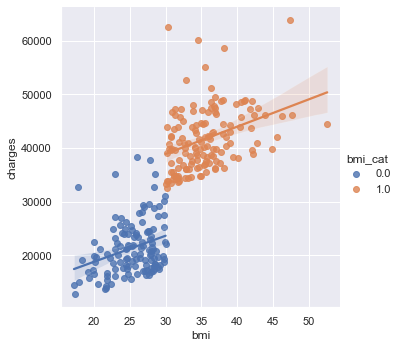

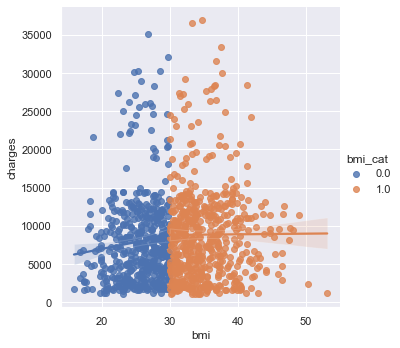

In [24]:
# Creates a new categorical feature for bmi (30 is the cuttoff point for obese)
df['bmi_cat'] = np.nan
df.loc[df['bmi'] <= 30, 'bmi_cat'] = 0
df.loc[df['bmi'] > 30, 'bmi_cat'] = 1

sns.lmplot(data=df[df['smoker'] == 'yes'], x='bmi', y='charges', hue='bmi_cat')
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='bmi', y='charges', hue='bmi_cat')
plt.show()

# To fit a line through them, it appears crucial to divide smokers and nonsmokers into separate categories.
# When compared to the lmplot shown above with them added, the gradient of the line of best fit is completely different.
# We can see that while having a BMI over 30 doesn't actually affect the grade, the bias is considerably worse.

# Finally, we confirm that there is no split of the non-smokers along the bmi = 30 line.

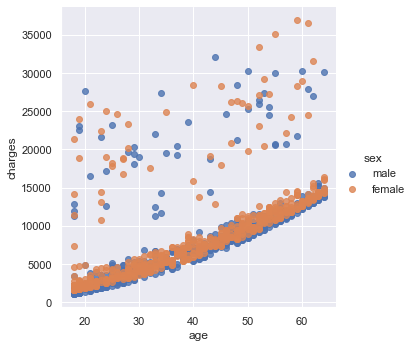

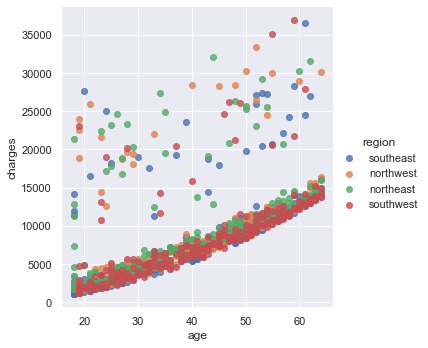

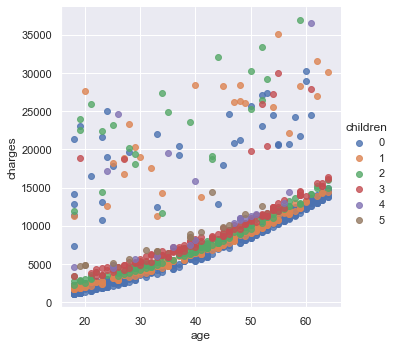

In [26]:
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='sex', fit_reg=False)
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='region', fit_reg=False)
plt.show()
sns.lmplot(data=df[df['smoker'] == 'no'], x='age', y='charges', hue='children', fit_reg=False)
plt.show()

# Here, we're trying to figure out why some cases have charges that are abnormally high.
# Even after eliminating the smokers, none of the remaining features show any association.
# This implies a medical explanation that is not supported by our findings.
# As a result, we won't be able to model this, and our final model will undoubtedly have some errors.
# The quantity of occurrences and the distribution, however, are far too regular to classify these as outliers and eliminate them.

# Additionally, we observe some exponential behaviour. When building a predictive model, this must be taken into account.

In [28]:
# Showing the correlation for various subgroups within the data
print('bmi correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['bmi']), '\n')
print('bmi correlation (smokers & bmi > 30) - ', 
      df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]["charges"].corr(df['bmi']))
print('bmi correlation (smokers & bmi < 30) - ', 
      df[(df['smoker'] == 'yes') & (df['bmi'] > 30)]['charges'].corr(df['bmi']), '\n')
print('bmi correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['bmi']))
print('age correlation (smokers) - ', df[df['smoker'] == 'yes']['charges'].corr(df['age']))
print('age correlation (non-smokers) - ', df[(df['smoker'] == 'no')]['charges'].corr(df['age']))

# Correlations for our groupings are now visible.
# As previously stated, there is only a slight upward shift in the association between bmi and charges for smokers at bmi=30, not a significant one.
# It's interesting to note that for non-smokers, there is absolutely no association between charges and bmi.

bmi correlation (smokers) -  0.8064806070155393 

bmi correlation (smokers & bmi > 30) -  0.3650624941873683
bmi correlation (smokers & bmi < 30) -  0.3650624941873683 

bmi correlation (non-smokers) -  0.08403654312833271
age correlation (smokers) -  0.36822444373077784
age correlation (non-smokers) -  0.627946783766419


In [34]:
# Replacing yes/no with 1/0 to aid in modelling
df['smoker'].replace(('yes', 'no'), (1, 0), inplace=True)
df['sex'].replace(('male', 'female'), (1, 0), inplace=True)

# Converts categorical data with more than two categories into a set of new features
# one for each different value in the old feature and only 1/0 as possible values
dummies = pd.get_dummies(df['region'])
df = pd.concat((df, dummies), axis = 1)
df = df.drop('region', axis = 1)

# Creating a Pearson correlation matrix to visualise correlations between features
df_corr = df.drop(['log_charges', 'bmi_cat'], axis = 1)
corr = df_corr.corr()
fig, ax = plt.subplots(dpi=200)
sns.heatmap(corr, cmap = 'Wistia', annot= True, ax=ax, annot_kws={"size": 6})
plt.show()

# Except for bmi, age, and obviously smoking, there are no other significant relationships with charges.
# We're also looking for relationships between the features in this case.
# When building the model, we should take note of the association between bmi and residents of the Southeast.

KeyError: 'region'

In [35]:
# A new df where we split up the number of children into new features to check for correlations
df_children = df[['charges', 'children']]

dummies_children = pd.get_dummies(df_children['children'])
df_children = pd.concat((df_children, dummies_children), axis = 1)
df_children = df_children.drop('children', axis = 1)

print('0 children - ', df_children['charges'].corr(df_children[0]))
print('1 children - ', df_children['charges'].corr(df_children[1]))
print('2 children - ', df_children['charges'].corr(df_children[2]))
print('3 children - ', df_children['charges'].corr(df_children[3]))
print('4 children - ', df_children['charges'].corr(df_children[4]))
print('5 children - ', df_children['charges'].corr(df_children[5]))

0 children -  -0.0647604763940957
1 children -  -0.02518035435360178
2 children -  0.0696389251302226
3 children -  0.06279529451603873
4 children -  0.006613915717664701
5 children -  -0.043258372948824925


In [37]:
# Now I will demonstrate linear regression with just one variable from scratch.
# In this case we will choose a feature that we know has good correlation with charges.
# I will therefore choose age for non-smokers.



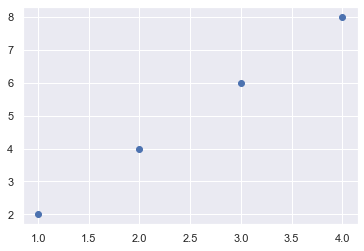

theta0 -  -4.9883369322054325e-06
theta1 -  2.000001696642868
final cost -  3.324681291387064e-11


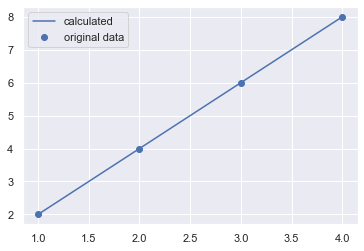

In [38]:
# Creating simple dummy values to fit a linear model to
X = np.array([1,2,3,4])
y = np.array([2,4,6,8])

plt.scatter(X, y)
plt.show()

# these are our inital guesses for the values of theta0 and theta1 (they do not have to be good guesses)
th0 = -15
th1 = 16
# The optimization parameter controls how quickly we descend the gradient
alpha = 0.1
loops = 1000

for ii in range(loops):
    # We must store the values in temporary holders so we can use the same values for both gradiant descent parts
    temp_th0 = th0 - grad_descent_th0(X, y, alpha, th0, th1)
    temp_th1 = th1 - grad_descent_th1(X, y, alpha, th0, th1)
    th0 = temp_th0
    th1 = temp_th1
    
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))

# Plotting the old data plus our predictions
plt.plot(X, linear_func(X, th0, th1), label='calculated')
plt.scatter(X, y, label='original data')
plt.legend()
plt.show()

In [39]:
X = df[df['smoker'] == 0]['age'].values
y = df[df['smoker'] == 0]['charges'].values
print(df.head())
print(X[:5])
print(y[:5])

   age  sex     bmi  children  smoker      charges  log_charges  bmi_cat  \
0   19    0  27.900         0       1  16884.92400     9.734176      0.0   
1   18    1  33.770         1       0   1725.55230     7.453302      1.0   
2   28    1  33.000         3       0   4449.46200     8.400538      1.0   
3   33    1  22.705         0       0  21984.47061     9.998092      0.0   
4   32    1  28.880         0       0   3866.85520     8.260197      0.0   

   northeast  northwest  southeast  southwest  
0          0          0          0          1  
1          0          0          1          0  
2          0          0          1          0  
3          0          1          0          0  
4          0          1          0          0  
[18 28 33 32 31]
[ 1725.5523   4449.462   21984.47061  3866.8552   3756.6216 ]


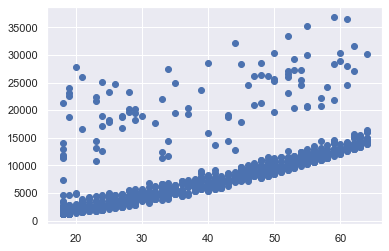

initial cost -  53993128354144.91
theta0 -  -2091.3953745523404
theta1 -  267.24834584340255
final cost -  12305294843659.19


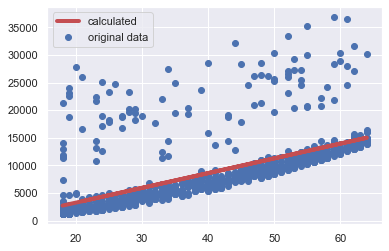

In [52]:
# Our chosen data set
plt.scatter(X, y)
plt.show()

th0 = -15
th1 = 16
alpha = 0.001
loops = 100000
print('initial cost - ', cost_func(X, y, th0, th1))

for ii in range(loops):
    temp_th0 = th0 - grad_descent_th0(X, y, alpha, th0, th1)
    temp_th1 = th1 - grad_descent_th1(X, y, alpha, th0, th1)
    th0 = temp_th0
    th1 = temp_th1
    
print('theta0 - ', th0)
print('theta1 - ', th1)
print('final cost - ', cost_func(X, y, th0, th1))

plt.plot(X, linear_func(X, th0, th1), label='calculated', c='r', linewidth=4)
plt.scatter(X, y, label='original data', c='b')
plt.legend()
plt.show()

In [42]:
# Multivariate linear regression
# We now go back to our full data set to use all of these features to create a linear regression model.
# The number of features and instances for our dummy data
instances = 50
features = 3

# Creating random values for our target weights
thetai = np.random.randint(1, 9, features+1)
print(thetai)

# Creating the input data randomly
df_inputs = pd.DataFrame()
# The bias 'feature' should all be ones so we add the same bias for each instance
df_inputs['bias'] = [1] * instances
for ii in range(features):
    df_inputs['feat_'+str(ii)] = np.random.randint(1,9,instances)

# creating an empty data series for our taget values
df_targets = pd.DataFrame()
df_targets['target'] = [0] * instances

# Creating the targets from the random weights and feature values so we have a good fit to aim for
feat_bias = df_inputs.columns.tolist()
for ii, col in enumerate(feat_bias):
    df_targets['target'] += (df_inputs[col] * thetai[ii])

# requires .float() to match the weight tensor created below
targets = torch.tensor(df_targets.values).float()
inputs = torch.tensor(df_inputs.values).float()

print(df_inputs.head())
print(df_targets.head())

[8 4 1 1]
   bias  feat_0  feat_1  feat_2
0     1       2       4       3
1     1       5       1       5
2     1       3       8       1
3     1       7       8       1
4     1       1       6       7
   target
0      23
1      34
2      29
3      45
4      25


In [43]:
def linear_func_mv(x, weights):
    return  x @ weights.t()

def cost_func_mv(X, y, weights):
    mm = len(X)
    return (1/2*mm) * torch.sum((linear_func_mv(X, weights) - y)**2)

initial cost -  tensor(1200607.7500, grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 0.6767919063568115 s to complete 3000 loops
final cost -  tensor(0.0893, grad_fn=<MulBackward0>)


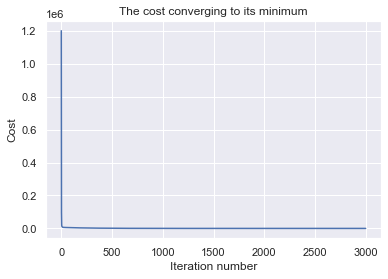


RESULTS

Pearson R -  0.9999998436698181
weights -  [8 4 1 1]
calculated weights -  tensor([[7.9693, 4.0018, 1.0021, 1.0027]], requires_grad=True)


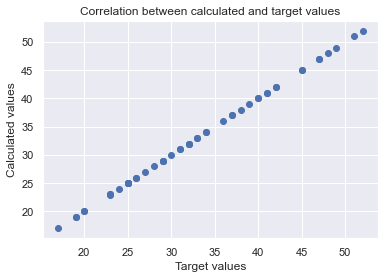

In [44]:
def mv_linear_regression_alg(inputs, targets, loops, alpha):

    # require_grad = True in order to backwards compute derivatives of the weights
    # number of weight coefficients equal to the number of features
    w = torch.randn(1, inputs.shape[1], requires_grad=True)

    print('initial cost - ', cost_func_mv(inputs, targets, w))
    print('Improving parameters...')

    cost_tracker = []

    t_mv1 = time.time()
    for i in range(loops):
        # Calculate the cost each time to analyse the current paramters
        cost = cost_func_mv(inputs, targets, w)
        # Adds the cost to a list to we ca see it change over time
        cost_tracker.append(cost_func_mv(inputs, targets, w).detach().numpy())
        # Calculating the partial derivatives
        cost.backward()
        # stop autograd from tracking history on Tensor
        with torch.no_grad():
            w -= w.grad * alpha
            # Resetting calculated derivatives to 0
            w.grad.zero_()
    t_mv2 = time.time()

    print(f'...time taken is {t_mv2 - t_mv1} s to complete {loops} loops')
    print('final cost - ', cost_func_mv(inputs, targets, w))

    return w, cost_tracker

alpha_mv = 1e-5
loops_mv = 3000
w, costs = mv_linear_regression_alg(inputs, targets, loops_mv, alpha_mv)

plt.plot(costs)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.show()

print('\nRESULTS\n')
# Getting our calculated values for target from our calculated parameters
df_targets['results'] = linear_func_mv(inputs, w).t().detach().numpy()[0]
print('Pearson R - ', df_targets['target'].corr(df_targets['results']))
print('weights - ', thetai)
print('calculated weights - ', w)

plt.scatter(df_targets['target'].values, df_targets['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()

In [45]:
df = pd.read_csv('Medical Price Dataset.csv')

instances_tot = df.shape[0]

# Splitting our dataset into a test and train to test our model and avoid over parameterisation
df_train = df[:int((instances_tot * 4)/5)]
df_test = df[int((instances_tot * 4)/5):]

# Inputting the features we want for our model
df_edit = pd.DataFrame()
bias = [1] * int((instances_tot * 4)/5)
df_edit['bias'] = bias
df_edit['smoker'] = df_train['smoker']
df_edit['bmi'] = df_train['bmi']
df_edit['age'] = df_train['age']
df_edit['age^2'] = df_train['age'] ** 2
df_edit['log_charges'] = np.log(df_train['charges'])

df_edit['bmi_cat'] = np.nan
df_edit.loc[df_edit['bmi'] <= 30, 'bmi_cat'] = 0
df_edit.loc[df_edit['bmi'] > 30, 'bmi_cat'] = 1

df_edit['smoker'].replace(('yes', 'no'), (1, 0), inplace=True)
df_edit['age'] = df_edit['age'] / (df_edit['age'].max() - df_edit['age'].min())
df_edit['age^2'] = df_edit['age^2'] / (df_edit['age^2'].max() - df_edit['age^2'].min())
df_edit['bmi'] = df_edit['bmi'] / (df_edit['bmi'].max() - df_edit['bmi'].min())

# splitting the features and the target ot create our inputs
df_inputs = df_edit.drop('log_charges', axis=1)
df_targets = pd.DataFrame()
df_targets['targets'] = df_edit['log_charges']

print(df_inputs.head())
print(df_targets.head())

   bias  smoker       bmi       age     age^2  bmi_cat
0     1       1  0.761879  0.413043  0.095705      0.0
1     1       0  0.922174  0.391304  0.085896      1.0
2     1       0  0.901147  0.608696  0.207847      1.0
3     1       0  0.620016  0.717391  0.288706      0.0
4     1       0  0.788640  0.695652  0.271474      0.0
    targets
0  9.734176
1  7.453302
2  8.400538
3  9.998092
4  8.260197


initial cost -  tensor(20842446., grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 2.6810848712921143 s to complete 10000 loops
final cost -  tensor(116904.3281, grad_fn=<MulBackward0>)

RESULTS



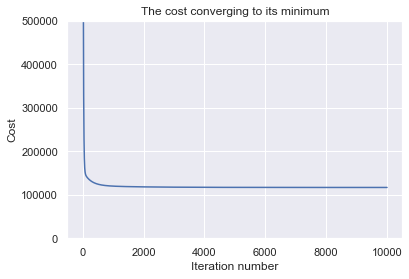

['bias', 'smoker', 'bmi', 'age', 'age^2', 'bmi_cat']
tensor([[ 6.5639,  1.5223,  0.1301,  3.3171, -1.7125,  0.1180]],
       requires_grad=True)
    targets   results
0  9.734176  9.391494
1  7.453302  7.952712
2  8.400538  8.462245
3  9.998092  8.529769
4  8.260197  8.509099
0.8718589056455576


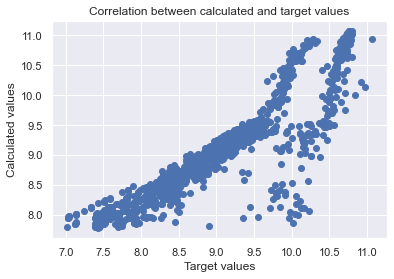

In [46]:
# Our inputs must be torch tensors
inputs = torch.tensor(df_inputs.values).float()
targets = torch.tensor(df_targets.values).float()
loops = 10000
alpha = 3e-7
# Calculating our parameters
w, costs = mv_linear_regression_alg(inputs, targets, loops, alpha)

print('\nRESULTS\n')
plt.plot(costs)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.ylim(0, 5e5)
plt.show()
print(df_inputs.columns.tolist())
print(w)
# Calculating our values for the target from our calculated parameters
df_targets['results'] = linear_func_mv(inputs, w).detach().numpy()
print(df_targets.head())
print(df_targets['targets'].corr(df_targets['results']))

plt.scatter(df_targets['targets'].values, df_targets['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()


Smokers gradient descent

initial cost -  tensor(4228017.5000, grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 2.375835657119751 s to complete 10000 loops
final cost -  tensor(1092.9557, grad_fn=<MulBackward0>)


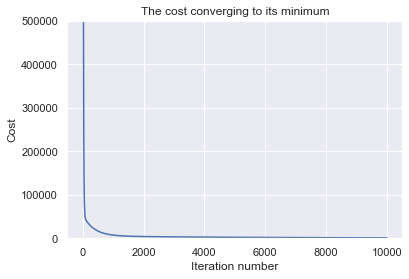


Non-smokers gradient descent

initial cost -  tensor(58362640., grad_fn=<MulBackward0>)
Improving parameters...
...time taken is 2.577256917953491 s to complete 10000 loops
final cost -  tensor(68983.6406, grad_fn=<MulBackward0>)


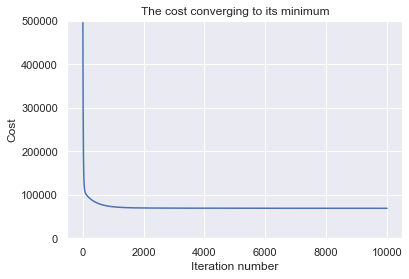

In [47]:
# Creating our smokers group and forming inputs and targets
df_smokers_i = df_edit[df_edit['smoker'] == 1]
df_smokers_t = pd.DataFrame()
df_smokers_t['targets'] = df_smokers_i['log_charges']
df_smokers_i = df_smokers_i.drop(['log_charges', 'smoker'], axis=1)

print('\nSmokers gradient descent\n')
inputs_s = torch.tensor(df_smokers_i.values).float()
targets_s = torch.tensor(df_smokers_t.values).float()
loops = 10000
alpha = 3e-7
w_s, costs_s = mv_linear_regression_alg(inputs_s, targets_s, loops, alpha)

plt.plot(costs_s)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.ylim(0, 5e5)
plt.show()

# Creating our non smokers group and forming inputs and targets
df_nonsmokers_i = df_edit[df_edit['smoker'] == 0]
df_nonsmokers_t = pd.DataFrame()
df_nonsmokers_t['targets'] = df_nonsmokers_i['log_charges']
df_nonsmokers_i = df_nonsmokers_i.drop(['log_charges', 'smoker'], axis=1)

print('\nNon-smokers gradient descent\n')
inputs_ns = torch.tensor(df_nonsmokers_i.values).float()
targets_ns = torch.tensor(df_nonsmokers_t.values).float()
loops = 10000
alpha = 3e-7
w_ns, costs_ns = mv_linear_regression_alg(inputs_ns, targets_ns, loops, alpha)

plt.plot(costs_ns)
plt.title('The cost converging to its minimum')
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.ylim(0, 5e5)
plt.show()

In [48]:
print('\nSMOKER RESULTS\n')
# looking at the names of the features with the calculated parameters for them
print(df_smokers_i.columns.tolist())
print(w_s)
df_smokers_t['results'] = linear_func_mv(inputs_s, w_s).detach().numpy()

print('\nNON SMOKER RESULTS\n')
print(df_nonsmokers_i.columns.tolist())
print(w_ns)
df_nonsmokers_t['results'] = linear_func_mv(inputs_ns, w_ns).detach().numpy()


SMOKER RESULTS

['bias', 'bmi', 'age', 'age^2', 'bmi_cat']
tensor([[ 7.5150,  2.3373,  1.5345, -1.0914,  0.0182]], requires_grad=True)

NON SMOKER RESULTS

['bias', 'bmi', 'age', 'age^2', 'bmi_cat']
tensor([[ 6.4381, -0.1210,  3.9296, -2.0319,  0.0419]], requires_grad=True)


    targets   results
0  9.734176  9.825142
1  7.453302  7.731659
2  8.400538  8.340686
3  9.998092  8.595591
4  8.260197  8.524781
0.9009970060423174


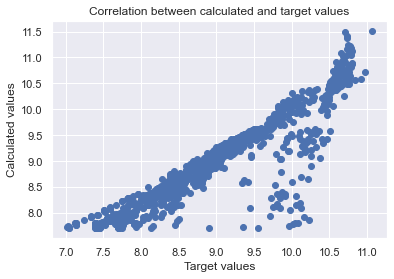

In [49]:
# Combining our final results for smokers and non smokers
df_final_i = pd.concat([df_nonsmokers_i, df_smokers_i])
df_final_i = df_final_i.sort_index()
df_final_t = pd.concat([df_nonsmokers_t, df_smokers_t])
df_final_t = df_final_t.sort_index()
print(df_final_t.head())
print(df_final_t['targets'].corr(df_final_t['results']))

plt.scatter(df_final_t['targets'].values, df_final_t['results'].values)
plt.title('Correlation between calculated and target values')
plt.xlabel('Target values')
plt.ylabel('Calculated values')
plt.show()

In [50]:
# Separating the inputs and the target data in our test group
df_targets_test = pd.DataFrame()
df_targets_test['targets'] = df_test['charges']

df_inputs_test = df_test.drop('charges', axis=1)

print(df_inputs_test.head())
print(df_targets_test.head())

      age     sex     bmi  children smoker     region
1070   37    male  37.070         1    yes  southeast
1071   63    male  31.445         0     no  northeast
1072   21    male  31.255         0     no  northwest
1073   54  female  28.880         2     no  northeast
1074   60  female  18.335         0     no  northeast
          targets
1070  39871.70430
1071  13974.45555
1072   1909.52745
1073  12096.65120
1074  13204.28565


0.8975153328201574


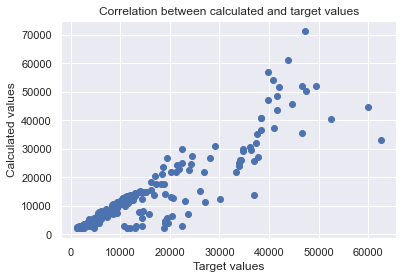

      age     sex     bmi  children smoker     region      charges  \
1070   37    male  37.070         1    yes  southeast  39871.70430   
1071   63    male  31.445         0     no  northeast  13974.45555   
1072   21    male  31.255         0     no  northwest   1909.52745   
1073   54  female  28.880         2     no  northeast  12096.65120   
1074   60  female  18.335         0     no  northeast  13204.28565   

      predicted_charges  
1070       46970.794945  
1071       15051.502987  
1072        2785.985179  
1073       11899.033935  
1074       14234.842741  


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20868\2377637707.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_charges'] = predict_changes(df_inputs_test, df_targets_test)


In [51]:
def predict_changes(dfin, dfout):
    
    # The old indexing creates problems when operating across different dataframes
    dfin = dfin.reset_index(drop=True)
    dfout = dfout.reset_index(drop=True)
    
    # We dont want the smoker feature in our inputs but we still need to to treat our two groups separately
    dfout['smoker'] = dfin['smoker']
    
    # Creating our inputs in the same way as we did to train the model
    dfin_edit = pd.DataFrame()
    dfin_edit['bias'] = [1] * dfin.shape[0]
    
    dfin_edit['bmi'] = dfin['bmi']
    dfin_edit['age'] = dfin['age']
    dfin_edit['age^2'] = dfin['age'] ** 2
    dfin_edit['bmi_cat'] = np.nan
    dfin_edit.loc[dfin_edit['bmi'] <= 30, 'bmi_cat'] = 0
    dfin_edit.loc[dfin_edit['bmi'] > 30, 'bmi_cat'] = 1

    dfin_edit['age'] = dfin_edit['age'] / (dfin_edit['age'].max() - dfin_edit['age'].min())
    dfin_edit['age^2'] = dfin_edit['age^2'] / (dfin_edit['age^2'].max() - dfin_edit['age^2'].min())
    dfin_edit['bmi'] = dfin_edit['bmi'] / (dfin_edit['bmi'].max() - dfin_edit['bmi'].min())
    
    # Go through each row, check if they are smoker, and apply the correct parameters accordingly
    dfout['results_log'] = np.nan
    for index, row in dfin_edit.iterrows():
        if dfout.loc[index, 'smoker'] == 'yes':
            xx = torch.tensor(row.values).float()
            dfout.loc[index, 'results_log'] = (xx @ w_s.t()).detach().numpy()[0]
        if dfout.loc[index, 'smoker'] == 'no':
            xx = torch.tensor(row.values).float()
            dfout.loc[index, 'results_log'] = (xx @ w_ns.t()).detach().numpy()[0]

    # Our model predicts log(charges). We want to see what the actual charges are
    dfout['results'] = math.e ** dfout['results_log']
    
    print(dfout['targets'].corr(dfout['results']))
    plt.scatter(dfout['targets'].values, dfout['results'].values)
    plt.title('Correlation between calculated and target values')
    plt.xlabel('Target values')
    plt.ylabel('Calculated values')
    plt.show()
    
    # returns the predicted charges as a list (not part of a dataframe)
    return dfout['results'].values


df_test['predicted_charges'] = predict_changes(df_inputs_test, df_targets_test)

print(df_test.head())